In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import warnings
import os

warnings.filterwarnings("ignore")
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
os.environ["OMP_NUM_THREADS"] = "8"

# Cell segmentation

In [2]:
import lazyslide as zs

In [8]:
wsi = zs.datasets.lung_carcinoma(with_data=False)

WSI: /Users/yzheng/Library/Caches/lazyslide/lung_carcinoma.ndpi
Reader: openslide
Dimensions: 15616×16384 (h×w), 8 Pyramids
Pixel physical size: 0.22731405710129116 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1817, 1906)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
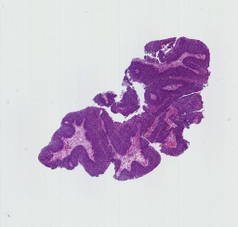

In [9]:
wsi

We are going to use instanseg for cell segmentation. instanseg runs better at mpp=0.5 with tile size of 512

In [14]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 512, background_fraction=0.95, mpp=0.5)

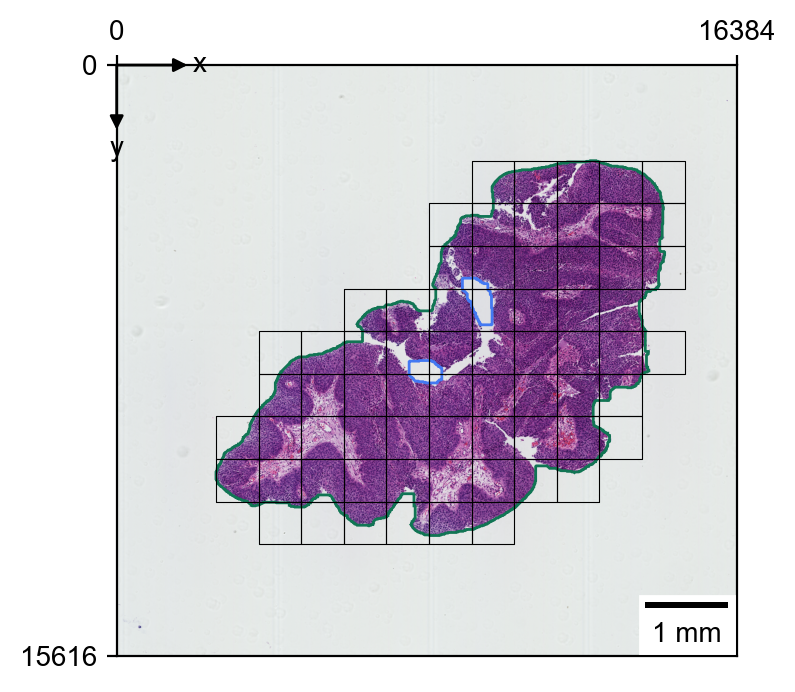

In [15]:
zs.pl.tiles(wsi, linewidth=0.4)

In [16]:
zs.seg.cells(wsi)

Output()

<Axes: >

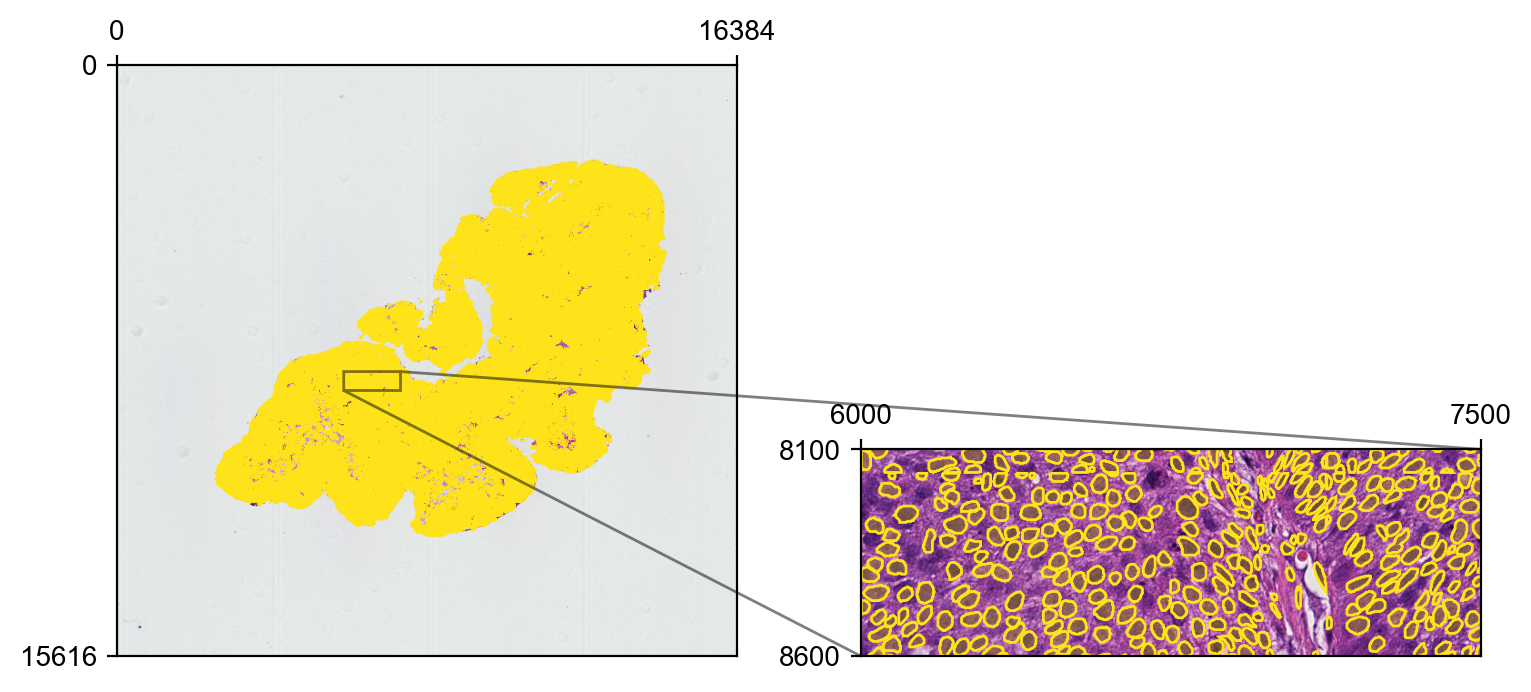

In [18]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cells", linewidth=0.1)
v.add_zoom(6000, 7500, 8100, 8600)
v.show()

In [19]:
zs.seg.nulite(wsi)

Output()

<Axes: >

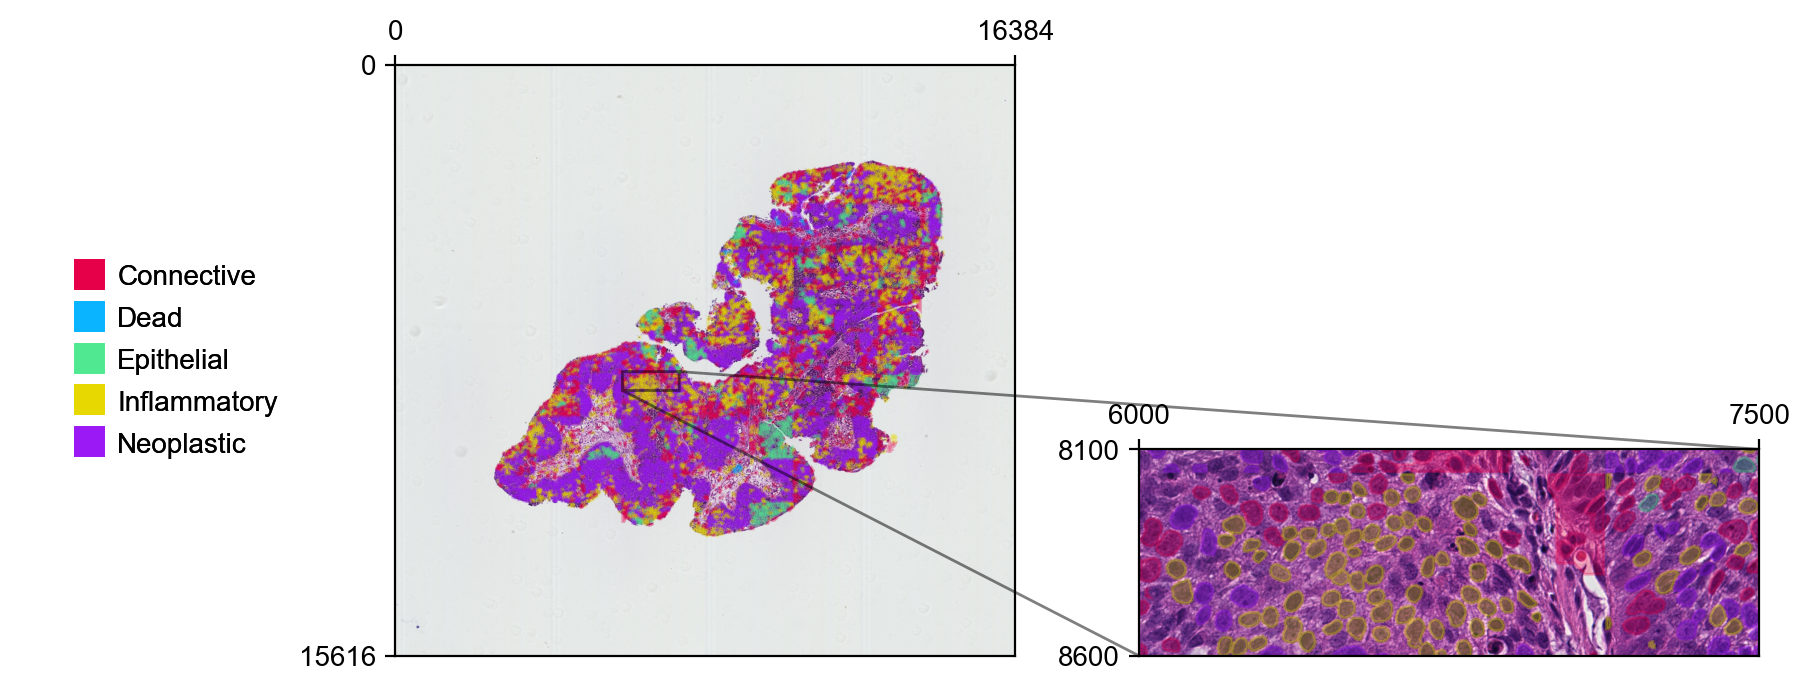

In [22]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cell_types", color_by="name")
v.add_zoom(6000, 7500, 8100, 8600)
v.show()